## Flipkart Laptop Data - Business Insights on Product Pricing

## Problem Statement
### Elon Musk has started his own laptop company (Tesla Laptop) in India. He wants to give tough fights to big companies like Apple, Alienware, HP etc.
    -He does not know how to estimate the price of laptops his company creates. In this competitive laptop market you cannot simply assume things.
    -Musk wants to find out some relation between features of a Laptop(eg:- RAM, OS etc) and its selling price. But he is not so good at Data Mining.
    -To solve this problem he already asked his Data Engineering team to collect laptop data from various competitors.
    -Now he needs your (i.e Data Scientist’s) help to solve the following problem.
## Step- 1 (Data Analysis and Mining)
    -Musk’s Requirements
    -Build an interface (using streamlit) for Elon Musk where he can enter the laptop features like RAM Size, RAM Type, HDD, OS, etc. and get the price prediction.
    -Based on your Data Analysis and MIning skills, give recommendations to Elon Musk on how the pricing works in the laptop market.
## Sprint - 2 (ML Model Tuning)
    -Now he wants you to test the models you have created for Underfitting and Overfitting. He wants you to build a best fit model.
    -First try to check if the models you have created are a best fit or not.
    -See if applying cross validation helps improve your models performance.

## Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import re

In [139]:
df=pd.read_csv(r"C:\Users\Irfan\Downloads\laptop_details.csv")
df.head()

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 GB SSD/Windows 11 Home) 14ITL05 Thin and Light Laptop,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RAM64 bit Windows 11 Operating System256 GB SSD35.56 cm (14 inch) DisplayOffice Home and Student 20212 Year Onsite�Warranty
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) 82H801L7IN | 82H802FJIN | 82H802...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RAM64 bit Windows 11 Operating System512 GB SSD39.62 cm (15.6 inch) DisplayOffice Home and Student 20212 Year Onsite�Warranty
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 GB/512 GB SSD/Windows 11 Home) X515JA-EJ362WS | X515JA-E...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RAM64 bit Windows 11 Operating System512 GB SSD39.62 cm (15.6 inch) DisplayOffice Home and Student 20211 Year Onsite Warranty
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (8 GB/512 GB SSD/Windows 10/4 GB Graphics/NVIDIA GeForce ...,4.4,"₹49,990","AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64 bit Windows 10 Operating System512 GB SSD39.62 cm (15.6 inch) DisplayHP Documentation, HP e-service, HP BIOS Recovery, HP SSRM, HP Smart, HP Jumpstarts1 Year Onsite Warranty"
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce G...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RAMWindows 11 Operating System512 GB SSD39.62 cm (15.6 inch) Display1 Year Onsite Warranty


In [140]:
pd.options.display.max_colwidth=10000000

In [141]:
df

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 GB SSD/Windows 11 Home) 14ITL05 Thin and Light Laptop,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RAM64 bit Windows 11 Operating System256 GB SSD35.56 cm (14 inch) DisplayOffice Home and Student 20212 Year Onsite�Warranty
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) 82H801L7IN | 82H802FJIN | 82H802...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RAM64 bit Windows 11 Operating System512 GB SSD39.62 cm (15.6 inch) DisplayOffice Home and Student 20212 Year Onsite�Warranty
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 GB/512 GB SSD/Windows 11 Home) X515JA-EJ362WS | X515JA-E...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RAM64 bit Windows 11 Operating System512 GB SSD39.62 cm (15.6 inch) DisplayOffice Home and Student 20211 Year Onsite Warranty
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (8 GB/512 GB SSD/Windows 10/4 GB Graphics/NVIDIA GeForce ...,4.4,"₹49,990","AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64 bit Windows 10 Operating System512 GB SSD39.62 cm (15.6 inch) DisplayHP Documentation, HP e-service, HP BIOS Recovery, HP SSRM, HP Smart, HP Jumpstarts1 Year Onsite Warranty"
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce G...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RAMWindows 11 Operating System512 GB SSD39.62 cm (15.6 inch) Display1 Year Onsite Warranty
...,...,...,...,...
715,ASUS Chromebook Flip Touch Celeron Dual Core - (4 GB/64 GB EMMC Storage/Chrome OS) C214MA-BU0452 Chrom...,4.0,"₹23,490",Intel Celeron Dual Core Processor4 GB LPDDR4 RAMChrome Operating System29.46 cm (11.6 inch) Touchscreen Display1 Year Onsite Warranty
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD R7-5800H - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphic...,4.5,"₹73,490",AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64 bit Windows 11 Operating System512 GB SSD39.62 cm (15.6 inch) Display1 Year Onsite�Warranty�+ 1 Year Premium Care + 1 Year Accidental Damage Protection
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS - (16 GB/1 TB SSD/Windows 11 Home/8 GB Graphics/NVIDIA ...,NaN,"₹1,94,990",AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM64 bit Windows 11 Operating System1 TB SSD39.62 cm (15.6 inch) Display1 Year Onsite Warranty
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel Core i7 12th Gen - (16 GB/512 GB SSD/Windows 11 Home) UP5...,3.0,"₹1,25,990",Intel Core i7 Processor (12th Gen)16 GB LPDDR5 RAM64 bit Windows 11 Operating System512 GB SSD35.56 cm (14 inch) Touchscreen Display1 Year Onsite Warranty


## Basic Exploration

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Product  720 non-null    object 
 1   Rating   581 non-null    float64
 2   MRP      720 non-null    object 
 3   Feature  720 non-null    object 
dtypes: float64(1), object(3)
memory usage: 22.6+ KB


## MRP column Type conversion

In [143]:
df['MRP'] = df['MRP'].apply(lambda x : x.replace('₹', '').replace(',', '')).astype(int)
df['MRP'][:5]

0    36990
1    39990
2    32990
3    49990
4    49990
Name: MRP, dtype: int32

## Extract Processor, RAM, Operating System, Storage, Brand from Features column

In [144]:
import re

In [145]:
regex = r'^\w+'
df['Brand']=df['Product'].apply(lambda x : re.findall(regex, x))
df['Brand']= df['Brand'].apply(lambda x : ''.join(x))

In [146]:
df['Brand'].head()

0    Lenovo
1    Lenovo
2      ASUS
3        HP
4      ASUS
Name: Brand, dtype: object

In [147]:
regex= r'^(?:AMD|Intel|M1|Apple)[\s\w]+Processor'
df['Processor_Type']=df['Feature'].apply(lambda x : re.findall(regex, x))
df['Processor_Type']=df['Processor_Type'].apply(lambda x : ''.join(x))
df['Processor_Type']=df['Processor_Type'].apply(lambda x: x.replace(" Processor", ""))

In [148]:
df['Processor_Type'].head()

0            Intel Core i3
1            Intel Core i3
2            Intel Core i3
3    AMD Ryzen 5 Hexa Core
4            Intel Core i5
Name: Processor_Type, dtype: object

In [149]:
regex= r'[\d]+[\s]bit[\s\w]+Operating System|[\(Windows)\d\s]+Operating System|[\(Chrome|Mac OS)]+Operating System'
df['Operating_System']=df['Feature'].apply(lambda x : re.findall(regex, x))
df['Operating_System']=df['Operating_System'].apply(lambda x : ''.join(x))
df['Operating_System']=df['Operating_System'].apply(lambda x: x.replace(" Operating System", ""))

In [150]:
df['Operating_System'].head()

0    64 bit Windows 11
1    64 bit Windows 11
2    64 bit Windows 11
3    64 bit Windows 10
4           Windows 11
Name: Operating_System, dtype: object

In [151]:
regex = r'\d+\sGB[\s\w]+RAM'
df['RAM'] = df['Feature'].apply(lambda x : re.findall(regex, x))
df.RAM = df.RAM.apply(lambda x : ''.join(x))

In [152]:
df['RAM'].head()

0    8 GB DDR4 RAM
1    8 GB DDR4 RAM
2    8 GB DDR4 RAM
3    8 GB DDR4 RAM
4    8 GB DDR4 RAM
Name: RAM, dtype: object

In [153]:
regex = r'[\d]+\s(?:GB|TB)\s(?:HDD|SSD)'
df['Storage']=df['Feature'].apply(lambda x : re.findall(regex, x))
df['Storage']=df['Storage'].apply(lambda x : ''.join(x))

In [154]:
df['Storage'].head()

0    256 GB SSD
1    512 GB SSD
2    512 GB SSD
3    512 GB SSD
4    512 GB SSD
Name: Storage, dtype: object

In [155]:
df['Display_inchs'] = df['Feature'].apply(lambda x: "".join(re.findall('(?:\d+|\d+.\d+)\sinch|(?:\d+|\d+.\d+)\sInch',x)))

df['Display_inchs'] = df['Display_inchs'].apply(lambda x: x.replace(' inch',''))

df['Display_inchs'] = df['Display_inchs'].apply(lambda x: x.replace(' Inch',''))

df['Display_inchs'] = df['Display_inchs'].apply(lambda x: x.replace('1414','14'))
df['Display_inchs'] = df['Display_inchs'].apply(lambda x: x.replace('206015.615.6','15.6'))
df['Display_inchs'] = df['Display_inchs'].apply(lambda x: x.replace('15.615.6','15.6'))

df['Display_inchs'].replace('',np.nan,inplace=True)




In [156]:
df['Display_inchs'].head()

0      14
1    15.6
2    15.6
3    15.6
4    15.6
Name: Display_inchs, dtype: object

In [157]:
df["RAM_Type"]=df["RAM"].apply(lambda x : "".join(re.findall("GB (.+).RAM",x)))

In [158]:
df["RAM"]=df["RAM"].apply(lambda x : "".join(re.findall("\d+ GB",x)))

In [159]:
df['RAM_Type'].head()

0    DDR4
1    DDR4
2    DDR4
3    DDR4
4    DDR4
Name: RAM_Type, dtype: object

In [160]:
pd.options.display.max_colwidth=10000000

In [161]:
df.head()

,Product,Rating,MRP,Feature,Brand,Processor_Type,Operating_System,RAM,Storage,Display_inchs,RAM_Type
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 GB SSD/Windows 11 Home) 14ITL05 Thin and Light Laptop,4.2,36990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RAM64 bit Windows 11 Operating System256 GB SSD35.56 cm (14 inch) DisplayOffice Home and Student 20212 Year Onsite�Warranty,Lenovo,Intel Core i3,64 bit Windows 11,8 GB,256 GB SSD,14,DDR4
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) 82H801L7IN | 82H802FJIN | 82H802...,4.2,39990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RAM64 bit Windows 11 Operating System512 GB SSD39.62 cm (15.6 inch) DisplayOffice Home and Student 20212 Year Onsite�Warranty,Lenovo,Intel Core i3,64 bit Windows 11,8 GB,512 GB SSD,15.6,DDR4
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 GB/512 GB SSD/Windows 11 Home) X515JA-EJ362WS | X515JA-E...,4.3,32990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RAM64 bit Windows 11 Operating System512 GB SSD39.62 cm (15.6 inch) DisplayOffice Home and Student 20211 Year Onsite Warranty,ASUS,Intel Core i3,64 bit Windows 11,8 GB,512 GB SSD,15.6,DDR4
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (8 GB/512 GB SSD/Windows 10/4 GB Graphics/NVIDIA GeForce ...,4.4,49990,"AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64 bit Windows 10 Operating System512 GB SSD39.62 cm (15.6 inch) DisplayHP Documentation, HP e-service, HP BIOS Recovery, HP SSRM, HP Smart, HP Jumpstarts1 Year Onsite Warranty",HP,AMD Ryzen 5 Hexa Core,64 bit Windows 10,8 GB,512 GB SSD,15.6,DDR4
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce G...,4.4,49990,Intel Core i5 Processor (10th Gen)8 GB DDR4 RAMWindows 11 Operating System512 GB SSD39.62 cm (15.6 inch) Display1 Year Onsite Warranty,ASUS,Intel Core i5,Windows 11,8 GB,512 GB SSD,15.6,DDR4


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product           720 non-null    object 
 1   Rating            581 non-null    float64
 2   MRP               720 non-null    int32  
 3   Feature           720 non-null    object 
 4   Brand             720 non-null    object 
 5   Processor_Type    720 non-null    object 
 6   Operating_System  720 non-null    object 
 7   RAM               720 non-null    object 
 8   Storage           720 non-null    object 
 9   Display_inchs     718 non-null    object 
 10  RAM_Type          720 non-null    object 
dtypes: float64(1), int32(1), object(9)
memory usage: 59.2+ KB


In [163]:
df.isnull().sum()

Product               0
Rating              139
MRP                   0
Feature               0
Brand                 0
Processor_Type        0
Operating_System      0
RAM                   0
Storage               0
Display_inchs         2
RAM_Type              0
dtype: int64

In [164]:
df[df['Processor_Type']=='']

,Product,Rating,MRP,Feature,Brand,Processor_Type,Operating_System,RAM,Storage,Display_inchs,RAM_Type
6,DELL Inspiron Core i3 11th Gen - (8 GB/1 TB HDD/256 GB SSD/Windows 11 Home) D560841WIN9S Thin and Ligh...,4.3,38990,"Processor: Intel i3-1115G4 (Base- 1.70 GHz & Turbo up to 4.10 GHz) 2 CoresRAM & Storage: 8GB DDR4 & 1TB + 256GB SSDGraphics & Keyboard: Integrated & Standard KeyboardDisplay: 15.6"" FHD WVA AG Narrow BorderPorts: 2x USB 3.2 Gen1 ,1x USB 2.0, HDMI 1.4, SD Card reader, Audio jack, 1 M.2 2230/2280 slot for solid-state drive/Intel OptaneIntel Core i3 Processor (11th Gen)8 GB DDR4 RAMWindows 11 Operating System1 TB HDD|256 GB SSD39.62 cm (15.6 inch) Display1 YEAR",DELL,,Windows 11,8 GB,1 TB HDD256 GB SSD,15.6,DDR4
8,realme Book (Slim) Core i3 11th Gen - (8 GB/256 GB SSD/Windows 10 Home) RMNB1001 Thin and Light Laptop,4.4,46990,"Stylish & Portable Thin and Light Laptop14 inch 2K QHD, IPS LCD Display ( 400nits peak brightness, 100% sRGB, 3:2 aspect ratio, Full Vision Display)Finger Print Sensor for Faster System AccessLight Laptop without Optical Disk DriveIntel Core i3 Processor (11th Gen)8 GB DDR4 RAM64 bit Windows 10 Operating System256 GB SSD35.56 cm (14 inch) DisplayNA1 Year Domestic Warranty",realme,,64 bit Windows 10,8 GB,256 GB SSD,14,DDR4
29,realme Book (Slim) Core i3 11th Gen - (8 GB/256 GB SSD/Windows 10 Home) RMNB1001 Thin and Light Laptop,4.4,46990,"Stylish & Portable Thin and Light Laptop14 inch 2K QHD, IPS LCD Display ( 400nits peak brightness, 100% sRGB, 3:2 aspect ratio, Full Vision Display)Finger Print Sensor for Faster System AccessLight Laptop without Optical Disk DriveIntel Core i3 Processor (11th Gen)8 GB DDR4 RAM64 bit Windows 10 Operating System256 GB SSD35.56 cm (14 inch) DisplayNA1 Year Domestic Warranty",realme,,64 bit Windows 10,8 GB,256 GB SSD,14,DDR4
33,acer Aspire 7 Ryzen 5 Hexa Core AMD R5-5500U - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA G...,4.4,47990,"Free upgrade to Windows 11 when availableAMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64 bit Windows 11 Operating System512 GB SSD39.62 cm (15.6 inch) DisplayAcer Collection , Acer Product Registration, Acer Care Center, Quick Access1 Year International Travelers Warranty (ITW)",acer,,64 bit Windows 11,8 GB,512 GB SSD,15.6,DDR4
53,realme Book(Slim) Intel Evo Core i5 11th Gen - (8 GB/512 GB SSD/Windows 10 Home) RMNB1002 Thin and Lig...,4.4,59990,Powered by 11th Gen Intel Evo Core i5 ProcessorMicrosoft Office 2019 Home & Student IncludedStylish Thin and Light Laptop without Optical Disk DriveIntel Core i5 Processor (11th Gen)8 GB DDR4 RAM64 bit Windows 10 Operating System512 GB SSD35.56 cm (14 inch) DisplayMicrosoft Office 2019 Home & Student1 Year Domestic Warranty,realme,,64 bit Windows 10,8 GB,512 GB SSD,14,DDR4
54,acer Aspire 7 Core i5 10th Gen - (8 GB/512 GB SSD/Windows 10 Home/4 GB Graphics/NVIDIA GeForce GTX 165...,4.4,47990,"Free upgrade to Windows 11 when availableIntel Core i5 Processor (10th Gen)8 GB DDR4 RAM64 bit Windows 10 Operating System512 GB SSD39.62 cm (15.6 inch) DisplayQuick Access, Acer Care Center, Acer Product Registration, Acer Collection1 Year International Travelers Warranty",acer,,64 bit Windows 10,8 GB,512 GB SSD,15.6,DDR4
69,DELL Ryzen 5 Hexa Core AMD R5-5600H - (16 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce R...,4.6,70990,"Processor: AMD Ryzen R5-5600H (3.30 GHz up to 4.20 GHz) 16MB L3RAM & Storage: 16GB DDR4 (2 DIMM Slots) & 512GB SSDGraphics: NVIDIA GEFORCE RTX 3050 (4GB GDDR6) TGP Up To 80WDisplay: 15.6"" FHD WVA AG 250 nits 120Hz Narrow Border, Backlit Keyboard OrangeColor: Phantom Grey with specklesPorts: (1) HDMI 2.1, (2) SuperSpeed USB 2.0 Gen 1 Type-A including (1) with PowerShare, (1) SuperSpeed USB 3.2, (1) USB-C Data/Display Port Alt-Mode, Headphone/Mic, (1) RJ45WiFi & BT: Killer Wi-Fi 6 AX1650 (2x2) and BluetoothAMD Ryzen 5 Hexa Core Processor16 GB DDR4 RAM64 bit Windows 11 Operating System512 GB SSD39.62 cm (15.6 inch) DisplayOffice Home and Student 20211 Year Onsite H

In [165]:
df.iloc[6,5]='Intel i3-1115G4'
df.iloc[8,5]='Intel Core i3'
df.iloc[29,5]='Intel Core i3'
df.iloc[33,5]='AMD Ryzen 5 Hexa Core'
df.iloc[53,5]='Intel Evo Core i5'
df.iloc[54,5]='Intel Core i5'
df.iloc[69,5]='AMD Ryzen R5-5600H'
df.iloc[83,5]='Qualcomm Snapdragon 7c Gen 2'
df.iloc[94,5]='Intel PQC-N5030'
df.iloc[116,5]='Gen Intel Evo Core i5'
df.iloc[122,5]='AMD Ryzen 7 Octa Core'
df.iloc[142,5]='AMD Ryzen 3 Dual Core'
df.iloc[172,5]='Intel i3-1115G4'
df.iloc[232,5]='Intel Core i7'
df.iloc[249,5]='Intel i3-1125G4'
df.iloc[253,5]='AMD Ryzen 5-3450U'
df.iloc[259,5]='Intel Core i5'
df.iloc[349,5]='Intel Core i5-1135G7'
df.iloc[355,5]='Intel Core i3-1005G1'
df.iloc[393,5]='Intel Core i5'
df.iloc[438,5]='Intel Core i5'
df.iloc[443,5]='Intel Core i7'
df.iloc[502,5]='AMD Ryzen 5 Hexa Core'
df.iloc[508,5]='Intel Core i5 Pro'
df.iloc[593,5]='Intel i7-11800H'
df.iloc[622,5]='Intel Core i7'
df.iloc[628,5]='Intel Core i9'
df.iloc[643,5]='Intel Core i7'
df.iloc[644,5]='Intel Core i5'
df.iloc[645,5]='AMD Ryzen 5 Hexa Core'
df.iloc[688,5]='Intel Core i7'
df.iloc[689,5]='Intel Core i7'

In [166]:
df['Processor_Type'].value_counts()

Intel Core i5                   155
Intel Core i3                   131
AMD Ryzen 9 Octa Core            87
AMD Ryzen 7 Octa Core            80
Intel Core i7                    55
AMD Ryzen 5 Hexa Core            51
AMD Ryzen 3 Dual Core            43
AMD Ryzen 5 Quad Core            37
Intel Celeron Dual Core          20
Intel Core i9                    11
Apple M1                          7
Apple M1 Pro                      6
Apple M2                          5
AMD Ryzen 3 Quad Core             4
Intel Celeron Quad Core           3
Intel Pentium Quad Core           3
Intel i3-1115G4                   2
AMD Athlon Dual Core              2
Intel Pentium Silver              2
Intel Core i3-1005G1              1
Intel Core i5-1135G7              1
AMD Dual Core                     1
Intel Core i5 Pro                 1
AMD Ryzen 5-3450U                 1
Intel i7-11800H                   1
AMD Ryzen 5 Dual Core             1
Intel PQC-N5030                   1
Intel i3-1125G4             

## Create column with only main processors

In [167]:
df['Processor_Type'].replace("Gen Intel Evo Core i5","Intel Evo Core i5", inplace=True)

In [168]:
df[['Processor','x','y','z','a']]=df['Processor_Type'].str.split(" ", expand=True)
df.drop(['Processor_Type','x','y','z','a'], axis=1, inplace=True)
df['Processor'].value_counts()

Intel       390
AMD         310
Apple        19
Qualcomm      1
Name: Processor, dtype: int64

## Operating System Column

In [169]:
df['Operating_System'].value_counts()

64 bit Windows 11                     404
Windows 11                            156
64 bit Windows 10                     115
MMac OS                                19
Windows 10                             12
MChrome                                 6
OS                                      2
64 bit DOS                              2
32 bit Windows 11                       1
5Operating System64 bit Windows 10      1
 Windows 1064 bit Windows 10            1
64 bit Chrome                           1
Name: Operating_System, dtype: int64

In [170]:
len(df[df['Operating_System']==''])

0

## Replace some of Operating system with suitable name.

In [171]:


df['Operating_System'].replace({'MMac OS':'Mac', 'OS':'Mac', 'MChrome':'Chrome',
                                '5Operating System64 bit Windows 10':'Windows 10',
                               ' Windows 1064 bit Windows 10':'Windows 10',
                               '64 bit Chrome':'Chrome'}, inplace=True)

df['Operating_System']=df['Operating_System'].apply(lambda x: x.replace('64 bit ', '').replace('32 bit ','').replace('64 bit ',''))
df['Operating_System'].value_counts()

Windows 11    561
Windows 10    129
Mac            21
Chrome          7
DOS             2
Name: Operating_System, dtype: int64

## RAM column

In [172]:
df['RAM'].value_counts()

8 GB                402
16 GB               263
4 GB                 37
32 GB                17
128 GB512 GB8 GB      1
Name: RAM, dtype: int64

In [173]:
df['RAM']=df['RAM'].apply(lambda x: x.replace("128 GB512 GB8 GB","8 GB"))

In [174]:
df['RAM'].value_counts()

8 GB     403
16 GB    263
4 GB      37
32 GB     17
Name: RAM, dtype: int64

In [175]:
df['RAM']=df['RAM'].apply(lambda x: x.replace("64GB EMMC","64 GB"))
df['RAM']=df['RAM'].apply(lambda x: x.replace("128GB EMMC","64 GB"))
df['RAM']=df['RAM'].apply(lambda x: x.replace("32GB EMMC","32 GB"))

In [176]:
df['RAM_Type'].value_counts()

DDR4                                                                                           560
DDR5                                                                                            92
LPDDR4X                                                                                         37
Unified Memory                                                                                  12
LPDDR5                                                                                           9
LPDDR4                                                                                           8
SSD for Reduced Boot Up Time and in Game LoadingUpgradable SSD Upto 512 GB and RAM8 GB DDR4      1
LPDDR3                                                                                           1
Name: RAM_Type, dtype: int64

In [177]:
df['RAM_Type']=df['RAM_Type'].apply(lambda x: x.replace("SSD for Reduced Boot Up Time and in Game LoadingUpgradable SSD Upto 512 GB and RAM8 GB DDR4","DDR4"))
df['RAM_Type']=df['RAM_Type'].apply(lambda x: x.replace("Unified Memory","Unified"))

In [178]:
df['RAM_Type'].value_counts()

DDR4       561
DDR5        92
LPDDR4X     37
Unified     12
LPDDR5       9
LPDDR4       8
LPDDR3       1
Name: RAM_Type, dtype: int64

## Storage_column

In [179]:
df['Storage'].value_counts()

512 GB SSD                      375
1 TB SSD                        176
256 GB SSD                       98
1 TB HDD256 GB SSD               26
1 TB HDD                         17
                                 10
2 TB SSD                          7
128 GB SSD                        6
1 TB HDD512 GB SSD                2
128 GB SSD1 TB HDD128 GB SSD      2
256 GB HDD256 GB SSD              1
Name: Storage, dtype: int64

In [180]:
df[df['Storage']=='']

,Product,Rating,MRP,Feature,Brand,Operating_System,RAM,Storage,Display_inchs,RAM_Type,Processor
83,SAMSUNG Galaxy Book Go Snapdragon 7c Gen 2 - (4 GB/128 GB EMMC Storage/Windows 11 Home) NP340XLA-KA1IN...,4.4,32990,Qualcomm Snapdragon 7c Gen 2 Processor4 GB LPDDR4X RAMWindows 11 Operating System35.56 cm (14 Inch) DisplayOffice Home and Student 20211 Year Onsite Warranty,SAMSUNG,Windows 11,4 GB,,14,LPDDR4X,Qualcomm
89,Lenovo IdeaPad 3 CB Celeron Dual Core - (4 GB/64 GB EMMC Storage/Chrome OS) 14IGL05 Thin and Light Lap...,NaN,19490,Intel Celeron Dual Core Processor4 GB DDR4 RAMChrome Operating System35.56 cm (14 Inch) Display1 Year Carry-in Warranty,Lenovo,Chrome,4 GB,,14,DDR4,Intel
96,Lenovo IdeaPad 3 CB Celeron Dual Core - (4 GB/64 GB EMMC Storage/Chrome OS) 14IGL05 Thin and Light Lap...,NaN,19490,Intel Celeron Dual Core Processor4 GB DDR4 RAMChrome Operating System35.56 cm (14 Inch) Display1 Year Carry-in Warranty,Lenovo,Chrome,4 GB,,14,DDR4,Intel
345,ASUS Chromebook Flip Touch Celeron Dual Core - (4 GB/32 GB EMMC Storage/Chrome OS) C214MA-BU0704 Chrom...,4.0,14990,Intel Celeron Dual Core Processor4 GB LPDDR4 RAMChrome Operating System29.46 cm (11.6 inch) Touchscreen Display1 Year Onsite Warranty,ASUS,Chrome,4 GB,,11.6,LPDDR4,Intel
509,ASUS Chromebook Flip Touch Celeron Dual Core - (4 GB/64 GB EMMC Storage/Chrome OS) C523NA-A20303 Chrom...,4.0,24390,Intel Celeron Dual Core Processor4 GB LPDDR4 RAMChrome Operating System39.62 cm (15.6 inch) Touchscreen Display1 Year Onsite Warranty,ASUS,Chrome,4 GB,,15.6,LPDDR4,Intel
544,ASUS EeeBook 12 Celeron Dual Core - (4 GB/64 GB EMMC Storage/Windows 11 Home) E210MA-GJ011W Thin and L...,4.5,21990,Intel Celeron Dual Core Processor4 GB DDR4 RAM64 bit Windows 11 Operating System29.46 cm (11.6 Inch) Display1 Year Onsite warranty,ASUS,Windows 11,4 GB,,11.6,DDR4,Intel
559,ASUS EeeBook 12 Celeron Dual Core - (4 GB/64 GB EMMC Storage/Windows 11 Home) E210MA-GJ012W Thin and L...,4.0,19990,Intel Celeron Dual Core Processor4 GB DDR4 RAM64 bit Windows 11 Operating System29.46 cm (11.6 Inch) Display1 Year Onsite warranty,ASUS,Windows 11,4 GB,,11.6,DDR4,Intel
632,Lenovo IdeaPad Flex 3 Chromebook Celeron Dual Core - (4 GB/128 GB EMMC Storage/Chrome OS) CB 11IJL6 Ch...,3.6,28490,Intel Celeron Dual Core Processor4 GB LPDDR4X RAM64 bit Chrome Operating System29.46 cm (11.6 inch) Touchscreen Display1 Year Onsite�Warranty,Lenovo,Chrome,4 GB,,11.6,LPDDR4X,Intel
695,ASUS Chromebook Celeron Dual Core - (4 GB/64 GB EMMC Storage/Chrome OS) C423NA-EC0521 Chromebook,4.1,25990,Intel Celeron Dual Core Processor4 GB LPDDR4 RAMChrome Operating System35.56 cm (14 inch) Touchscreen Display1 Year Onsite Warranty,ASUS,Chrome,4 GB,,14,LPDDR4,Intel
715,ASUS Chromebook Flip Touch Celeron Dual Core - (4 GB/64 GB EMMC Storage/Chrome OS) C214MA-BU0452 Chrom...,4.0,23490,Intel Celeron Dual Core Processor4 GB LPDDR4 RAMChrome Operating System29.46 cm (11.6 inch) Touchscreen Display1 Year Onsite Warranty,ASUS,Chrome,4 GB,,11.6,LPDDR4,Intel


In [181]:
df['RAM'].value_counts()

8 GB     403
16 GB    263
4 GB      37
32 GB     17
Name: RAM, dtype: int64

In [182]:
df.columns

Index(['Product', 'Rating', 'MRP', 'Feature', 'Brand', 'Operating_System',
       'RAM', 'Storage', 'Display_inchs', 'RAM_Type', 'Processor'],
      dtype='object')

In [183]:
df['Storage'].replace({'256 GB SSD':'256GB SSD'}, inplace=True)
df['Storage'].replace({'512 GB SSD':'512GB SSD'}, inplace=True)
df['Storage'].replace({'1 TB SSD':'1TB SSD'}, inplace=True)
df['Storage'].replace({'1 TB HDD':'1TB HDD'}, inplace=True)
df['Storage'].replace({'128 GB SSD':'128GB SSD'}, inplace=True)
df['Storage'].replace({'2 TB SSD':'2TB SSD'}, inplace=True)
df['Storage'].replace({'1 TB HDD256 GB SSD':'1TB HDD'}, inplace=True)
df['Storage'].replace({'256 GB HDD256 GB SSD':'256GB HDD'}, inplace=True)
df['Storage'].replace({'1 TB HDD512 GB SSD':'1TB HDD'}, inplace=True)
df['Storage'].replace({'128 GB SSD1 TB HDD128 GB SSD':'1TB HDD'}, inplace=True)

In [184]:
df[['Disc Size','Disc Type']]=df['Storage'].str.split(' ', expand=True)

df.drop(['Storage'], axis=1, inplace=True)
df.head()

,Product,Rating,MRP,Feature,Brand,Operating_System,RAM,Display_inchs,RAM_Type,Processor,Disc Size,Disc Type
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 GB SSD/Windows 11 Home) 14ITL05 Thin and Light Laptop,4.2,36990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RAM64 bit Windows 11 Operating System256 GB SSD35.56 cm (14 inch) DisplayOffice Home and Student 20212 Year Onsite�Warranty,Lenovo,Windows 11,8 GB,14,DDR4,Intel,256GB,SSD
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) 82H801L7IN | 82H802FJIN | 82H802...,4.2,39990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RAM64 bit Windows 11 Operating System512 GB SSD39.62 cm (15.6 inch) DisplayOffice Home and Student 20212 Year Onsite�Warranty,Lenovo,Windows 11,8 GB,15.6,DDR4,Intel,512GB,SSD
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 GB/512 GB SSD/Windows 11 Home) X515JA-EJ362WS | X515JA-E...,4.3,32990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RAM64 bit Windows 11 Operating System512 GB SSD39.62 cm (15.6 inch) DisplayOffice Home and Student 20211 Year Onsite Warranty,ASUS,Windows 11,8 GB,15.6,DDR4,Intel,512GB,SSD
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (8 GB/512 GB SSD/Windows 10/4 GB Graphics/NVIDIA GeForce ...,4.4,49990,"AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64 bit Windows 10 Operating System512 GB SSD39.62 cm (15.6 inch) DisplayHP Documentation, HP e-service, HP BIOS Recovery, HP SSRM, HP Smart, HP Jumpstarts1 Year Onsite Warranty",HP,Windows 10,8 GB,15.6,DDR4,AMD,512GB,SSD
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce G...,4.4,49990,Intel Core i5 Processor (10th Gen)8 GB DDR4 RAMWindows 11 Operating System512 GB SSD39.62 cm (15.6 inch) Display1 Year Onsite Warranty,ASUS,Windows 11,8 GB,15.6,DDR4,Intel,512GB,SSD


In [185]:
df['Disc Size'].value_counts()

512GB    375
1TB      223
256GB     99
          10
2TB        7
128GB      6
Name: Disc Size, dtype: int64

In [186]:
df[df['Disc Size']=='']

,Product,Rating,MRP,Feature,Brand,Operating_System,RAM,Display_inchs,RAM_Type,Processor,Disc Size,Disc Type
83,SAMSUNG Galaxy Book Go Snapdragon 7c Gen 2 - (4 GB/128 GB EMMC Storage/Windows 11 Home) NP340XLA-KA1IN...,4.4,32990,Qualcomm Snapdragon 7c Gen 2 Processor4 GB LPDDR4X RAMWindows 11 Operating System35.56 cm (14 Inch) DisplayOffice Home and Student 20211 Year Onsite Warranty,SAMSUNG,Windows 11,4 GB,14,LPDDR4X,Qualcomm,,None
89,Lenovo IdeaPad 3 CB Celeron Dual Core - (4 GB/64 GB EMMC Storage/Chrome OS) 14IGL05 Thin and Light Lap...,NaN,19490,Intel Celeron Dual Core Processor4 GB DDR4 RAMChrome Operating System35.56 cm (14 Inch) Display1 Year Carry-in Warranty,Lenovo,Chrome,4 GB,14,DDR4,Intel,,None
96,Lenovo IdeaPad 3 CB Celeron Dual Core - (4 GB/64 GB EMMC Storage/Chrome OS) 14IGL05 Thin and Light Lap...,NaN,19490,Intel Celeron Dual Core Processor4 GB DDR4 RAMChrome Operating System35.56 cm (14 Inch) Display1 Year Carry-in Warranty,Lenovo,Chrome,4 GB,14,DDR4,Intel,,None
345,ASUS Chromebook Flip Touch Celeron Dual Core - (4 GB/32 GB EMMC Storage/Chrome OS) C214MA-BU0704 Chrom...,4.0,14990,Intel Celeron Dual Core Processor4 GB LPDDR4 RAMChrome Operating System29.46 cm (11.6 inch) Touchscreen Display1 Year Onsite Warranty,ASUS,Chrome,4 GB,11.6,LPDDR4,Intel,,None
509,ASUS Chromebook Flip Touch Celeron Dual Core - (4 GB/64 GB EMMC Storage/Chrome OS) C523NA-A20303 Chrom...,4.0,24390,Intel Celeron Dual Core Processor4 GB LPDDR4 RAMChrome Operating System39.62 cm (15.6 inch) Touchscreen Display1 Year Onsite Warranty,ASUS,Chrome,4 GB,15.6,LPDDR4,Intel,,None
544,ASUS EeeBook 12 Celeron Dual Core - (4 GB/64 GB EMMC Storage/Windows 11 Home) E210MA-GJ011W Thin and L...,4.5,21990,Intel Celeron Dual Core Processor4 GB DDR4 RAM64 bit Windows 11 Operating System29.46 cm (11.6 Inch) Display1 Year Onsite warranty,ASUS,Windows 11,4 GB,11.6,DDR4,Intel,,None
559,ASUS EeeBook 12 Celeron Dual Core - (4 GB/64 GB EMMC Storage/Windows 11 Home) E210MA-GJ012W Thin and L...,4.0,19990,Intel Celeron Dual Core Processor4 GB DDR4 RAM64 bit Windows 11 Operating System29.46 cm (11.6 Inch) Display1 Year Onsite warranty,ASUS,Windows 11,4 GB,11.6,DDR4,Intel,,None
632,Lenovo IdeaPad Flex 3 Chromebook Celeron Dual Core - (4 GB/128 GB EMMC Storage/Chrome OS) CB 11IJL6 Ch...,3.6,28490,Intel Celeron Dual Core Processor4 GB LPDDR4X RAM64 bit Chrome Operating System29.46 cm (11.6 inch) Touchscreen Display1 Year Onsite�Warranty,Lenovo,Chrome,4 GB,11.6,LPDDR4X,Intel,,None
695,ASUS Chromebook Celeron Dual Core - (4 GB/64 GB EMMC Storage/Chrome OS) C423NA-EC0521 Chromebook,4.1,25990,Intel Celeron Dual Core Processor4 GB LPDDR4 RAMChrome Operating System35.56 cm (14 inch) Touchscreen Display1 Year Onsite Warranty,ASUS,Chrome,4 GB,14,LPDDR4,Intel,,None
715,ASUS Chromebook Flip Touch Celeron Dual Core - (4 GB/64 GB EMMC Storage/Chrome OS) C214MA-BU0452 Chrom...,4.0,23490,Intel Celeron Dual Core Processor4 GB LPDDR4 RAMChrome Operating System29.46 cm (11.6 inch) Touchscreen Display1 Year Onsite Warranty,ASUS,Chrome,4 GB,11.6,LPDDR4,Intel,,None


In [187]:
df.columns

Index(['Product', 'Rating', 'MRP', 'Feature', 'Brand', 'Operating_System',
       'RAM', 'Display_inchs', 'RAM_Type', 'Processor', 'Disc Size',
       'Disc Type'],
      dtype='object')

In [188]:
df.iloc[83,-2]='128GB'
df.iloc[89,-2]='64GB'
df.iloc[96,-2]='64GB'
df.iloc[345,-2]='32GB'
df.iloc[509,-2]='64GB'
df.iloc[544,-2]='64GB'
df.iloc[559,-2]='64GB'
df.iloc[632,-2]='128GB'
df.iloc[695,-2]='64GB'
df.iloc[715,-2]='64GB'

In [189]:
df['Disc Size'].value_counts()

512GB    375
1TB      223
256GB     99
128GB      8
64GB       7
2TB        7
32GB       1
Name: Disc Size, dtype: int64

In [190]:
df['Disc Type'].value_counts()

SSD    662
HDD     48
Name: Disc Type, dtype: int64

In [191]:
df.head()

,Product,Rating,MRP,Feature,Brand,Operating_System,RAM,Display_inchs,RAM_Type,Processor,Disc Size,Disc Type
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 GB SSD/Windows 11 Home) 14ITL05 Thin and Light Laptop,4.2,36990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RAM64 bit Windows 11 Operating System256 GB SSD35.56 cm (14 inch) DisplayOffice Home and Student 20212 Year Onsite�Warranty,Lenovo,Windows 11,8 GB,14,DDR4,Intel,256GB,SSD
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) 82H801L7IN | 82H802FJIN | 82H802...,4.2,39990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RAM64 bit Windows 11 Operating System512 GB SSD39.62 cm (15.6 inch) DisplayOffice Home and Student 20212 Year Onsite�Warranty,Lenovo,Windows 11,8 GB,15.6,DDR4,Intel,512GB,SSD
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 GB/512 GB SSD/Windows 11 Home) X515JA-EJ362WS | X515JA-E...,4.3,32990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RAM64 bit Windows 11 Operating System512 GB SSD39.62 cm (15.6 inch) DisplayOffice Home and Student 20211 Year Onsite Warranty,ASUS,Windows 11,8 GB,15.6,DDR4,Intel,512GB,SSD
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (8 GB/512 GB SSD/Windows 10/4 GB Graphics/NVIDIA GeForce ...,4.4,49990,"AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64 bit Windows 10 Operating System512 GB SSD39.62 cm (15.6 inch) DisplayHP Documentation, HP e-service, HP BIOS Recovery, HP SSRM, HP Smart, HP Jumpstarts1 Year Onsite Warranty",HP,Windows 10,8 GB,15.6,DDR4,AMD,512GB,SSD
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce G...,4.4,49990,Intel Core i5 Processor (10th Gen)8 GB DDR4 RAMWindows 11 Operating System512 GB SSD39.62 cm (15.6 inch) Display1 Year Onsite Warranty,ASUS,Windows 11,8 GB,15.6,DDR4,Intel,512GB,SSD


In [192]:
df.drop(['Product','Feature'],axis=1,inplace=True)

In [193]:
df.head()

,Rating,MRP,Brand,Operating_System,RAM,Display_inchs,RAM_Type,Processor,Disc Size,Disc Type
0,4.2,36990,Lenovo,Windows 11,8 GB,14,DDR4,Intel,256GB,SSD
1,4.2,39990,Lenovo,Windows 11,8 GB,15.6,DDR4,Intel,512GB,SSD
2,4.3,32990,ASUS,Windows 11,8 GB,15.6,DDR4,Intel,512GB,SSD
3,4.4,49990,HP,Windows 10,8 GB,15.6,DDR4,AMD,512GB,SSD
4,4.4,49990,ASUS,Windows 11,8 GB,15.6,DDR4,Intel,512GB,SSD


In [194]:
df.isnull().sum()

Rating              139
MRP                   0
Brand                 0
Operating_System      0
RAM                   0
Display_inchs         2
RAM_Type              0
Processor             0
Disc Size             0
Disc Type            10
dtype: int64

In [195]:
df['Rating'].fillna(df['Rating'].median(), inplace=True)
df.Rating.isna().sum()

0

In [196]:
df['Disc Type']=df['Disc Type'].fillna(df['Disc Type'].mode()[0])

In [197]:
df['Display_inchs'].fillna(df['Display_inchs'].median(), inplace=True)
df.Display_inchs.isna().sum()

0

In [198]:
df.isnull().sum()

Rating              0
MRP                 0
Brand               0
Operating_System    0
RAM                 0
Display_inchs       0
RAM_Type            0
Processor           0
Disc Size           0
Disc Type           0
dtype: int64

In [199]:
##drop duplicates
df.duplicated().sum()


306

In [200]:
df.drop_duplicates(inplace=True)

In [201]:
df.duplicated().sum()

0

In [202]:
df.reset_index(drop=True,inplace=True)

In [203]:
df

,Rating,MRP,Brand,Operating_System,RAM,Display_inchs,RAM_Type,Processor,Disc Size,Disc Type
0,4.2,36990,Lenovo,Windows 11,8 GB,14,DDR4,Intel,256GB,SSD
1,4.2,39990,Lenovo,Windows 11,8 GB,15.6,DDR4,Intel,512GB,SSD
2,4.3,32990,ASUS,Windows 11,8 GB,15.6,DDR4,Intel,512GB,SSD
3,4.4,49990,HP,Windows 10,8 GB,15.6,DDR4,AMD,512GB,SSD
4,4.4,49990,ASUS,Windows 11,8 GB,15.6,DDR4,Intel,512GB,SSD
...,...,...,...,...,...,...,...,...,...,...
409,4.3,76590,DELL,Windows 11,16 GB,13.3,DDR5,Intel,512GB,SSD
410,4.6,90000,HP,Windows 10,16 GB,15.6,DDR4,AMD,512GB,SSD
411,4.0,23490,ASUS,Chrome,4 GB,11.6,LPDDR4,Intel,64GB,SSD
412,3.0,125990,ASUS,Windows 11,16 GB,14,LPDDR5,Intel,512GB,SSD


In [204]:
df.to_csv('Tesla.csv',index=False)

In [205]:
df

,Rating,MRP,Brand,Operating_System,RAM,Display_inchs,RAM_Type,Processor,Disc Size,Disc Type
0,4.2,36990,Lenovo,Windows 11,8 GB,14,DDR4,Intel,256GB,SSD
1,4.2,39990,Lenovo,Windows 11,8 GB,15.6,DDR4,Intel,512GB,SSD
2,4.3,32990,ASUS,Windows 11,8 GB,15.6,DDR4,Intel,512GB,SSD
3,4.4,49990,HP,Windows 10,8 GB,15.6,DDR4,AMD,512GB,SSD
4,4.4,49990,ASUS,Windows 11,8 GB,15.6,DDR4,Intel,512GB,SSD
...,...,...,...,...,...,...,...,...,...,...
409,4.3,76590,DELL,Windows 11,16 GB,13.3,DDR5,Intel,512GB,SSD
410,4.6,90000,HP,Windows 10,16 GB,15.6,DDR4,AMD,512GB,SSD
411,4.0,23490,ASUS,Chrome,4 GB,11.6,LPDDR4,Intel,64GB,SSD
412,3.0,125990,ASUS,Windows 11,16 GB,14,LPDDR5,Intel,512GB,SSD


## Exploratory Data Analysis

## Outliers detection

In [206]:
df['MRP'].describe().T

count       414.000000
mean      80873.572464
std       61946.214367
min       14990.000000
25%       41672.500000
50%       61493.500000
75%       94990.000000
max      434830.000000
Name: MRP, dtype: float64

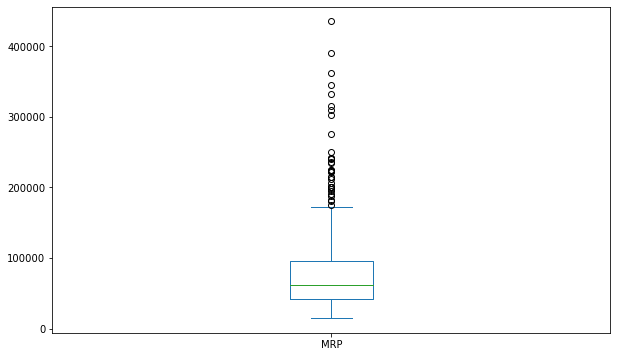

In [207]:
df['MRP'].plot(kind='box',figsize=(10,6));

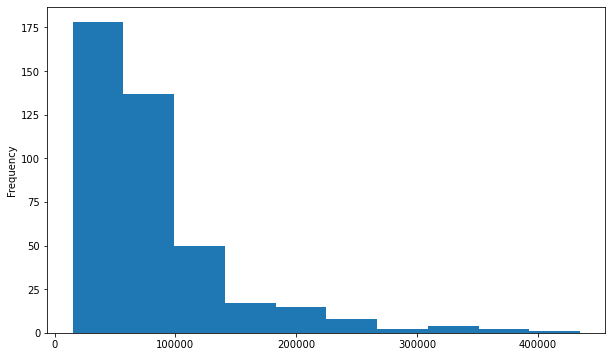

In [208]:
df['MRP'].plot(kind='hist',figsize=(10,6));


In [209]:
import seaborn as sns
import matplotlib.pyplot as plt

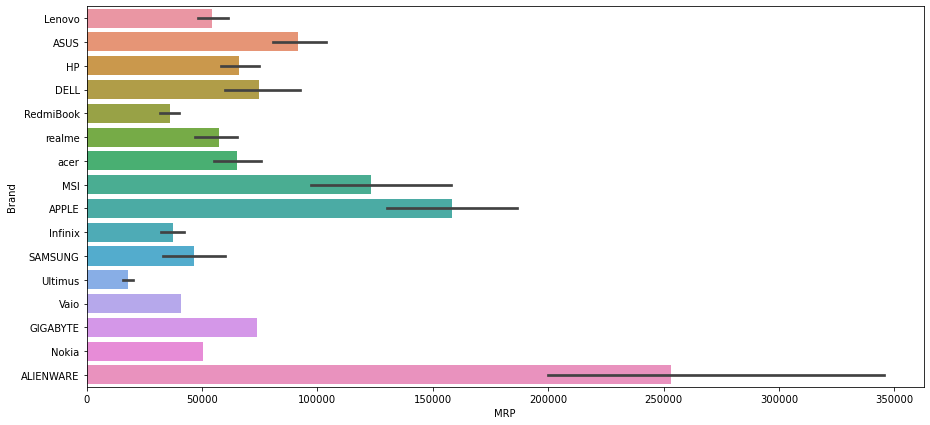

In [210]:
plt.figure(figsize=(15, 7))
sns.barplot(x='MRP', y ='Brand', data=df);

# Observation:
- Alienware brand laptop has more price compare to other laptops.

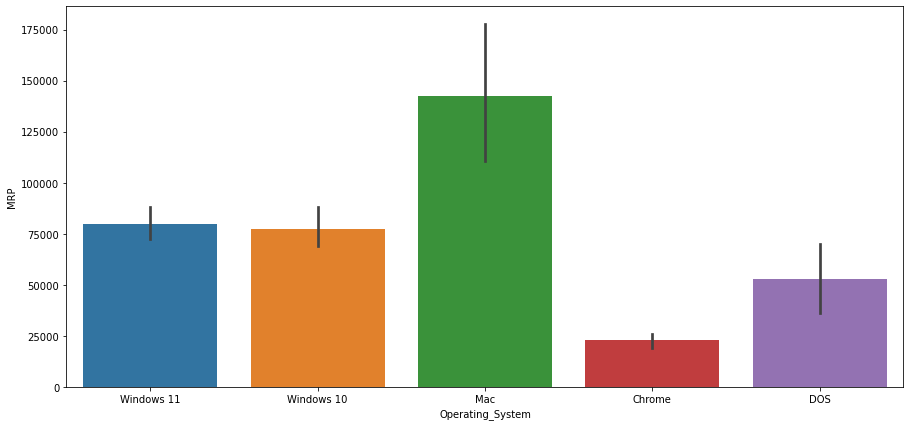

In [212]:
plt.figure(figsize=(15, 7))
sns.barplot(x='Operating_System', y ='MRP', data=df);

# Observation:
- Mac Operating_System have more price compare to other operating systems

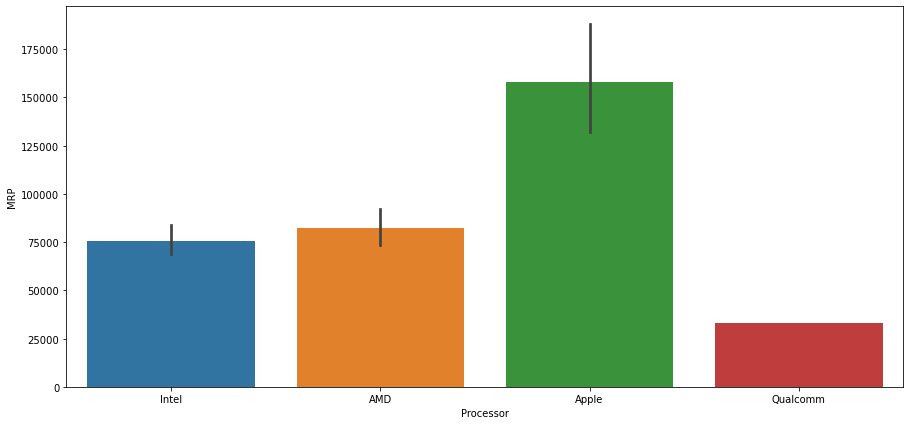

In [213]:
plt.figure(figsize=(15, 7))
sns.barplot(x='Processor', y ='MRP', data=df);

# Observation:
- Apple processor has more price compare to other processors

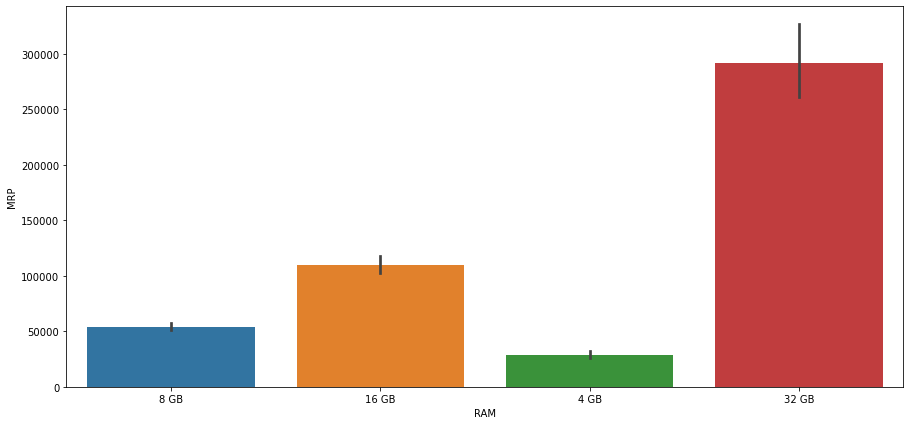

In [214]:
plt.figure(figsize=(15, 7))
sns.barplot(x='RAM', y ='MRP', data=df);

## Observation:- 
- 32 GB RAM has more price compare to other RAMS 

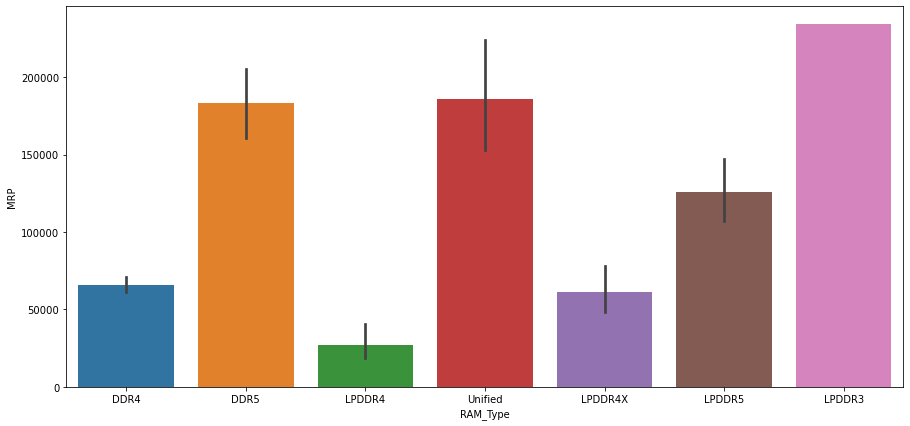

In [215]:
plt.figure(figsize=(15, 7))
sns.barplot(x='RAM_Type', y ='MRP', data=df);

# Observation:
- LPDDR3 RAM_TYPE have most prices compare to the other ram_typyes

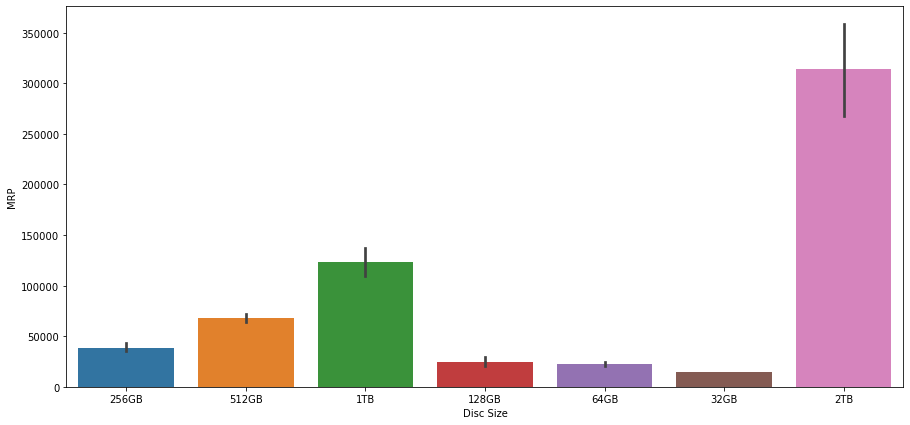

In [216]:
plt.figure(figsize=(15, 7))
sns.barplot(x='Disc Size', y ='MRP', data=df);

# Observation:
- 2TB Disc Size price is more compare to others Disc size

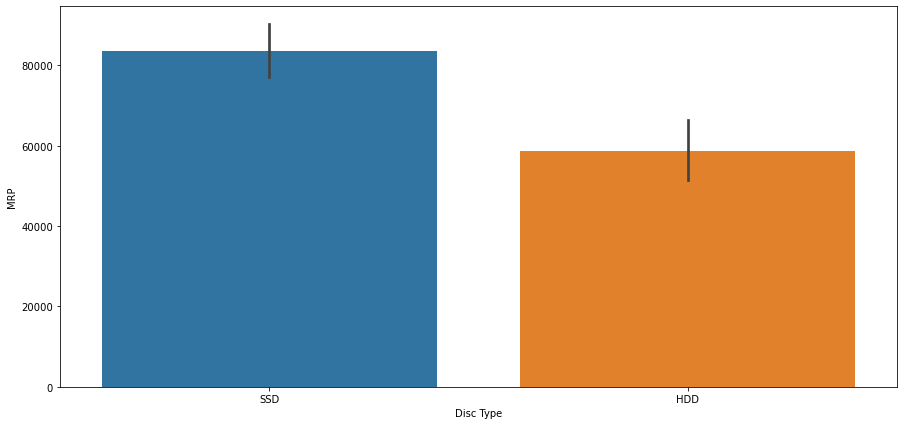

In [217]:
plt.figure(figsize=(15, 7))
sns.barplot(x='Disc Type', y ='MRP', data=df);

## Observation:
- SSD price is more compare to HDD price

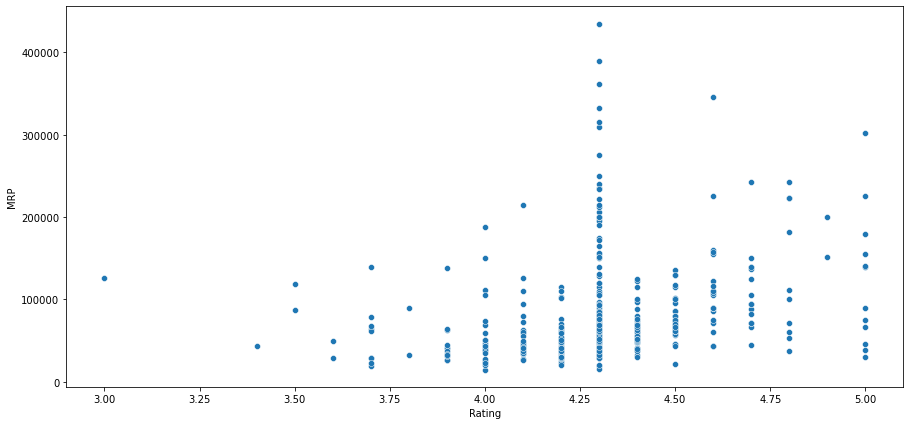

In [218]:
plt.figure(figsize=(15, 7))
sns.scatterplot(x='Rating', y ='MRP', data=df);

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rating            414 non-null    float64
 1   MRP               414 non-null    int32  
 2   Brand             414 non-null    object 
 3   Operating_System  414 non-null    object 
 4   RAM               414 non-null    object 
 5   Display_inchs     414 non-null    object 
 6   RAM_Type          414 non-null    object 
 7   Processor         414 non-null    object 
 8   Disc Size         414 non-null    object 
 9   Disc Type         414 non-null    object 
dtypes: float64(1), int32(1), object(8)
memory usage: 30.9+ KB


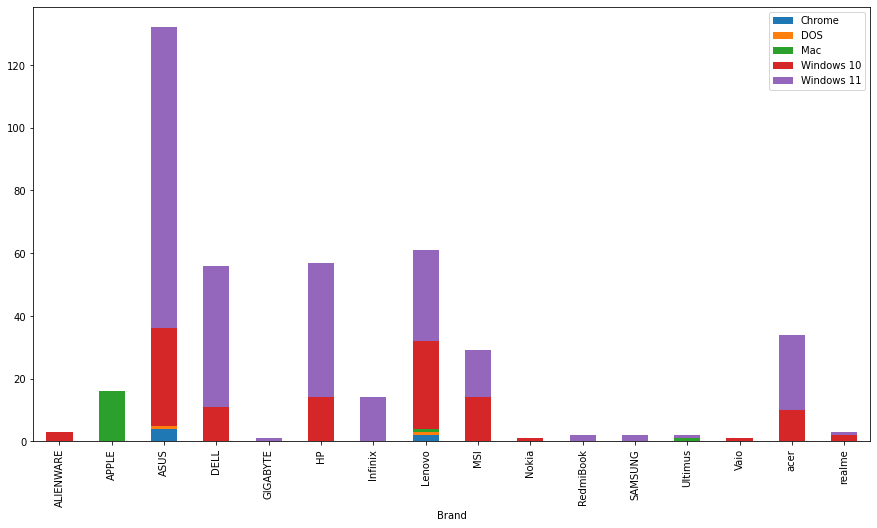

In [220]:
crosstab=pd.crosstab(df['Brand'],df['Operating_System'])
crosstab.plot(kind='bar',stacked=True,figsize=(15,8))
plt.legend(bbox_to_anchor=(1,1))
plt.show()

# Observation:
- Asus have more windows 11 Operating System

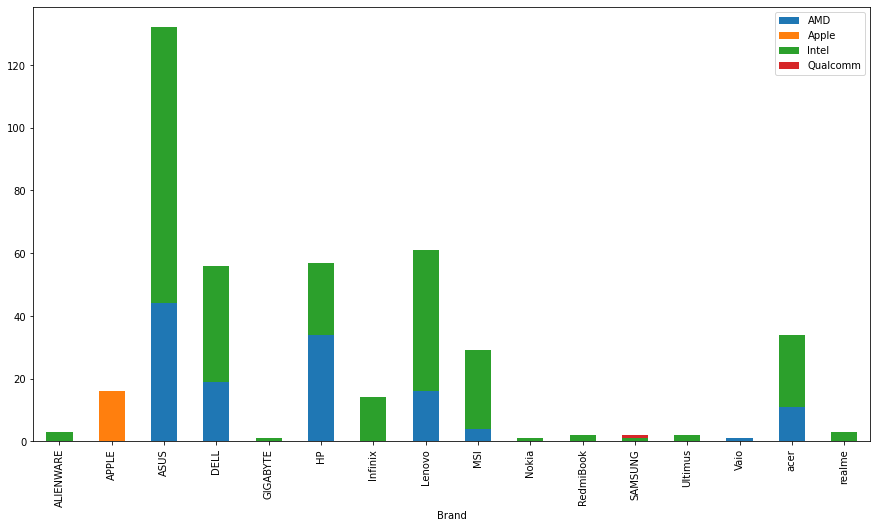

In [221]:
crosstab=pd.crosstab(df['Brand'],df['Processor'])
crosstab.plot(kind='bar',stacked=True,figsize=(15,8))
plt.legend(bbox_to_anchor=(1,1))
plt.show()

# Observation:
- Asus have more intel processor

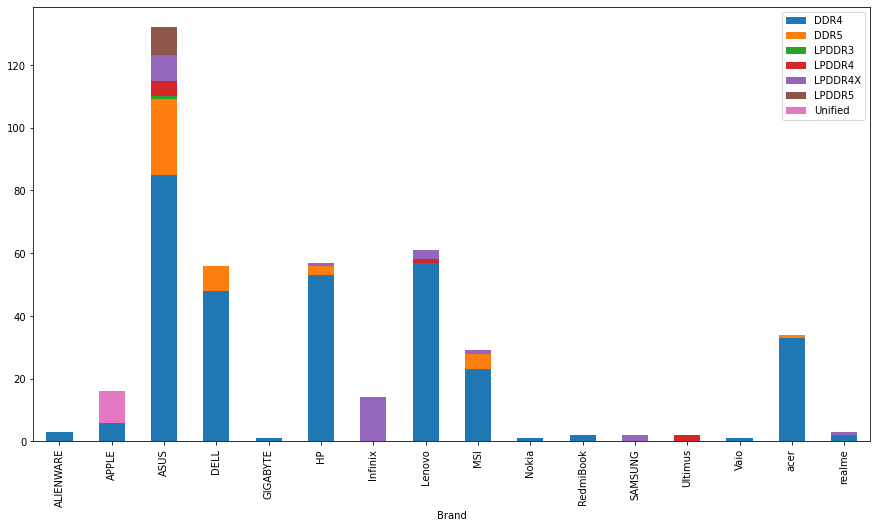

In [222]:
crosstab=pd.crosstab(df['Brand'],df['RAM_Type'])
crosstab.plot(kind='bar',stacked=True,figsize=(15,8))
plt.legend(bbox_to_anchor=(1,1))
plt.show()

# Observation:
- Asus have different types of RAM_Types compare to other models

In [229]:
df.groupby(['Brand']).agg({'MRP' : ['min', 'max', 'mean']}).T

Brand     ALIENWARE      APPLE          ASUS           DELL  GIGABYTE  \
MRP min    199990.0   88990.00   14990.00000   30428.000000   73990.0   
    max    345390.0  309490.00  361990.00000  434830.000000   73990.0   
    mean   253390.0  158146.25   91515.19697   74613.232143   73990.0   

Brand                HP       Infinix         Lenovo            MSI    Nokia  \
MRP min    25990.000000  20990.000000   19490.000000   43990.000000  50490.0   
    max   199990.000000  52990.000000  157990.000000  389990.000000  50490.0   
    mean   65943.157895  37347.142857   54489.147541  123411.344828  50490.0   

Brand     RedmiBook  SAMSUNG  Ultimus     Vaio           acer        realme  
MRP min     31990.0  32990.0  15990.0  40990.0   24990.000000  46990.000000  
    max     39990.0  59990.0  19990.0  40990.0  155490.000000  64999.000000  
    mean    35990.0  46490.0  17990.0  40990.0   65000.764706  57326.333333

Text(0.5, 1.0, 'Average Price of Laptop by Brand')

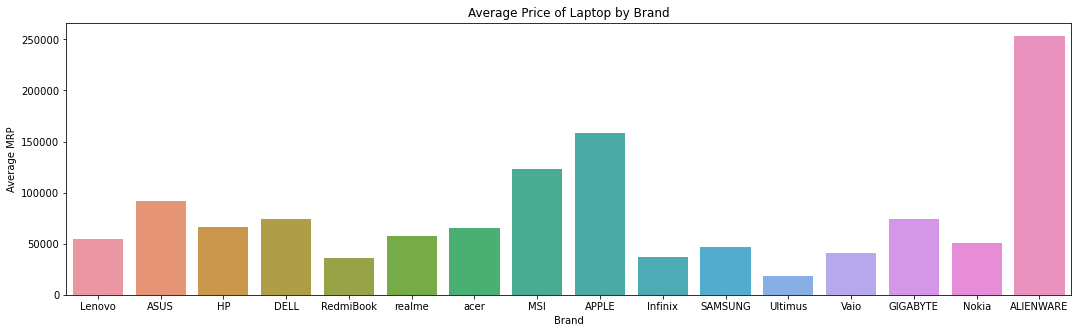

In [230]:
plt.figure(figsize=(18,5))
sns.barplot(data=df, x="Brand", y="MRP", ci=None);
plt.ylabel("Average MRP")
plt.title("Average Price of Laptop by Brand")

In [231]:
df.groupby('Processor').agg({'MRP' : ['min', 'max', 'mean']}).T

Processor            AMD      Apple          Intel  Qualcomm
MRP min     24990.000000   88990.00   14990.000000   32990.0
    max    361990.000000  309490.00  434830.000000   32990.0
    mean    82406.542636  158146.25   75701.063433   32990.0

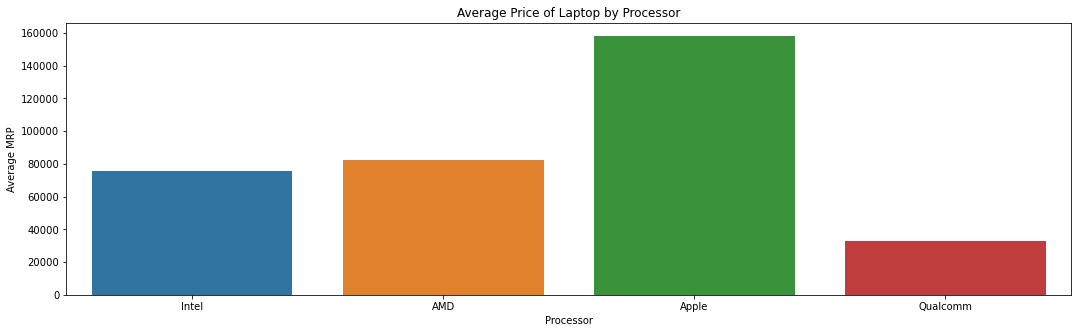

In [232]:
plt.figure(figsize=(18,5))
sns.barplot(data=df, x="Processor", y="MRP", ci=None)
plt.ylabel("Average MRP")
plt.title("Average Price of Laptop by Processor");

In [233]:
df['RAM'].unique()

array(['8 GB', '16 GB', '4 GB', '32 GB'], dtype=object)

In [234]:
df[df['RAM']=='32 GB']

,Rating,MRP,Brand,Operating_System,RAM,Display_inchs,RAM_Type,Processor,Disc Size,Disc Type
109,4.3,309490,APPLE,Mac,32 GB,16.2,Unified,Apple,1TB,SSD
143,4.7,241990,ASUS,Windows 11,32 GB,16,DDR5,Intel,1TB,SSD
224,5.0,301990,ASUS,Windows 11,32 GB,15.6,DDR5,Intel,1TB,SSD
239,4.3,239990,ASUS,Windows 11,32 GB,16,DDR5,Intel,1TB,SSD
250,4.3,274990,MSI,Windows 11,32 GB,15.6,DDR5,Intel,1TB,SSD
280,4.3,389990,MSI,Windows 11,32 GB,17.3,DDR5,Intel,2TB,SSD
320,4.3,199990,HP,Windows 11,32 GB,17.3,DDR5,Intel,1TB,SSD
328,4.3,249990,ASUS,Windows 11,32 GB,16,DDR5,AMD,2TB,SSD
344,4.3,314990,MSI,Windows 11,32 GB,17.3,DDR5,Intel,2TB,SSD
346,4.3,331990,ASUS,Windows 11,32 GB,16,DDR5,Intel,2TB,SSD


In [235]:
df.groupby('RAM').agg({'MRP' : ['min', 'max', 'mean']}).T

RAM               16 GB      32 GB        4 GB           8 GB
MRP min    37990.000000  199990.00  14990.0000   22990.000000
    max   241990.000000  434830.00  61249.0000  149990.000000
    mean  109669.468966  291411.25  28996.1875   54249.447964

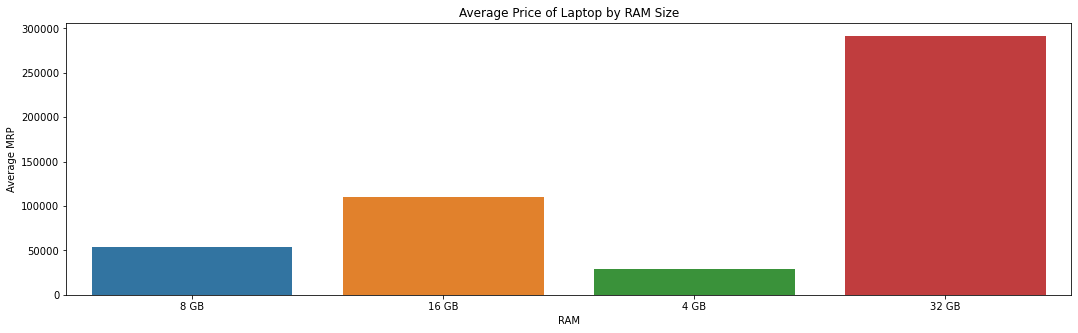

In [236]:
plt.figure(figsize=(18,5))
sns.barplot(data=df, x="RAM", y="MRP", ci=None)
plt.ylabel("Average MRP")
plt.title("Average Price of Laptop by RAM Size");

### Summay of relationship between Laptop features and Laptop Price and How the Laptop Pricing works in market.
- 1. Price for laptop brand ALIENWARE is ranges approximetely from 2 Lakh to 3.5 Lakh, these are costiest laptops.
- 2. Average price for ALIENWARE, APPLE, ASUS,MSI laptops brand is high.
- 3. Average price is high for Mac Operating System laptops.
- 4. Appleprocessor laptops has high average laptop price as compared to any other processor.
- 5. LPDDR3 RAM type laptops has highest average price.
- 6. SSD Disc type laptops has highest aaverage price.
- 7. Higher the RAM size higher the Price of laptop.
- 8. Higher the Disc size highrt the Price of laptop.
- 9. 64GB RAM size laptops have high average price.
- 10. 2TB Disc size laptops have high average price.

## Build Machine Learning Model

In [237]:
df.head()

,Rating,MRP,Brand,Operating_System,RAM,Display_inchs,RAM_Type,Processor,Disc Size,Disc Type
0,4.2,36990,Lenovo,Windows 11,8 GB,14,DDR4,Intel,256GB,SSD
1,4.2,39990,Lenovo,Windows 11,8 GB,15.6,DDR4,Intel,512GB,SSD
2,4.3,32990,ASUS,Windows 11,8 GB,15.6,DDR4,Intel,512GB,SSD
3,4.4,49990,HP,Windows 10,8 GB,15.6,DDR4,AMD,512GB,SSD
4,4.4,49990,ASUS,Windows 11,8 GB,15.6,DDR4,Intel,512GB,SSD


In [238]:
df=df[['Brand','Processor','Operating_System','RAM_Type','RAM','Disc Type','Disc Size','Display_inchs','MRP']]

In [239]:
df.head()

,Brand,Processor,Operating_System,RAM_Type,RAM,Disc Type,Disc Size,Display_inchs,MRP
0,Lenovo,Intel,Windows 11,DDR4,8 GB,SSD,256GB,14,36990
1,Lenovo,Intel,Windows 11,DDR4,8 GB,SSD,512GB,15.6,39990
2,ASUS,Intel,Windows 11,DDR4,8 GB,SSD,512GB,15.6,32990
3,HP,AMD,Windows 10,DDR4,8 GB,SSD,512GB,15.6,49990
4,ASUS,Intel,Windows 11,DDR4,8 GB,SSD,512GB,15.6,49990


## seggregation of the data

In [240]:
X=df[['Operating_System','RAM_Type','RAM','Disc Size']]
y=df[["MRP"]]

In [241]:
X["RAM"].value_counts()

8 GB     221
16 GB    145
4 GB      32
32 GB     16
Name: RAM, dtype: int64

## Label Encoding for RAM ,DISK SIZE ,RAM_TYPE,OPERATING_SYSTEM 

In [242]:
ram = {"32 GB":4,'16 GB':3,'8 GB':2,'4 GB':1}
X['RAM'] = X['RAM'].apply(lambda x: ram[x])

In [243]:
X["RAM_Type"].value_counts()

DDR4       315
DDR5        41
LPDDR4X     30
Unified     10
LPDDR5       9
LPDDR4       8
LPDDR3       1
Name: RAM_Type, dtype: int64

In [244]:
ram_type = {'Unified':7,'LPDDR5':6,'LPDDR4X':5,'LPDDR4':4,'LPDDR3':3,'DDR5':2,'DDR4':1}
X['RAM_Type'] = X['RAM_Type'].apply(lambda x: ram_type[x])

In [245]:
X['Disc Size'].value_counts()

512GB    218
1TB      115
256GB     62
128GB      6
64GB       6
2TB        6
32GB       1
Name: Disc Size, dtype: int64

In [246]:
storage_ssd={"2TB":7,"1TB":6,"512GB":5,"256GB":4,"128GB":3,"64GB":2,"32GB":1}
X['Disc Size'] = X['Disc Size'].apply(lambda x: storage_ssd[x])

In [247]:
X["Operating_System"].value_counts()

Windows 11    273
Windows 10    115
Mac            18
Chrome          6
DOS             2
Name: Operating_System, dtype: int64

In [248]:
os={"DOS":1,"Windows 10":3,"Windows 11":4,"Chrome":2,"Mac":5}
X['Operating_System'] = X['Operating_System'].apply(lambda x: os[x])

## SPLIT THE DATA

In [249]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=42)

In [250]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn import metrics

# RANDOM FOREST REGRESSION

## Hyper parameter Tunning using GridSearchCv

In [256]:
tuned_parameters = [{'max_depth':[i for i in range(1, 51)]}]

clf = GridSearchCV(
    estimator=tree ,
    param_grid=tuned_parameters, 
    scoring='r2',
    cv=5,
    return_train_score=True,
    verbose=1,
)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(max_depth=19),
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                        13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                        23, 24, 25, 26, 27, 28, 29, 30, ...]}],
             return_train_score=True, scoring='r2', verbose=1)

In [257]:
print("Best parameters set found on train set")
print(clf.best_params_)
print(clf.best_estimator_)
print()

print('Score on Test Data: ', clf.score(X_test, y_test))

Best parameters set found on train set
{'max_depth': 41}
RandomForestRegressor(max_depth=41)

Score on Test Data:  0.8242693387538713


In [251]:
from sklearn.ensemble import RandomForestRegressor   
tree=RandomForestRegressor(max_depth=19)


In [252]:
tree.fit(X_train,y_train)

RandomForestRegressor(max_depth=19)

In [253]:
y_train_pred=tree.predict(X_train)
r2=metrics.r2_score(y_train,y_train_pred)

n = len(y_train)
k = X_train.shape[1]

r2_adj = 1 - (1-r2)*(n-1)/(n-k-1)

print(r2_adj)
r2

0.8733460484264178


0.8747935221586873

In [254]:
y_test_pred=tree.predict(X_test)
r2=metrics.r2_score(y_test,y_test_pred)
n = len(y_test)
k = X_test.shape[1]

r2_adj = 1 - (1-r2)*(n-1)/(n-k-1)

print(r2_adj)
r2

0.8053974227253388


0.8179524277108008

In [258]:
cv_results1 = pd.DataFrame(clf.cv_results_)

cv_results1[cv_results1["rank_test_score"]==1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
40,0.087982,0.008622,0.006825,0.000395,41,{'max_depth': 41},0.750051,0.842754,0.878187,0.68386,...,0.780083,0.070576,1,0.877961,0.873153,0.854178,0.895781,0.893112,0.878837,0.015047


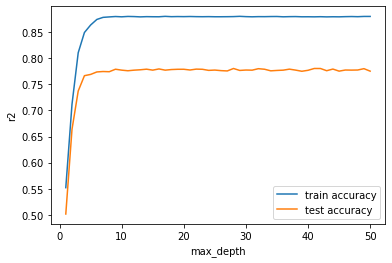

In [259]:
plt.plot(cv_results1['param_max_depth'], cv_results1['mean_train_score'])
plt.plot(cv_results1['param_max_depth'], cv_results1['mean_test_score'])
plt.xlabel('max_depth')
plt.ylabel('r2')
plt.legend(['train accuracy', 'test accuracy'], loc='lower right')

# Observation:
- .Randomforest regressor is the best model at max_depth=19

## Pickle 

In [260]:
import pickle

file = open('dataframe.pkl','wb')

pickle.dump(tree,file)